In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

daten = pd.read_csv('../../PyCharm/daten2.csv')
features = daten.drop(columns=['genre'])
labels = daten['genre']

#Daten normalisieren:
scaler = MinMaxScaler() 
scaler.fit(features) #scaler an die Daten anpassen (damit z.B. max und min bestimmt wird)
features_n = scaler.transform(features) # Daten mit den vorher festgelegten/bestimmten Werte (min/max) normalisieren.

#Datensatz trennen
X_train, X_test, Y_train, Y_test = train_test_split(features_n,labels,test_size=0.2,shuffle = True, random_state=27)

In [13]:
daten

,genre,bpm,rolloff,centroid,rms,zcr,spec_bw,spec_flatness,mfcc1,mfcc2,...,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,1,99.384014,5255.659886,2495.546632,0.289357,76192,2471.617014,0.031880,20.349596,80.351370,...,39.906560,7.662927,20.692038,1.414384,9.024804,1.513066,5.608293,-2.335551,7.899021,0.767538
1,1,123.046875,5431.883821,2900.316068,0.185551,122126,2344.055978,0.046646,-5.796152,63.040250,...,56.643787,-0.607900,6.109908,-3.358388,8.901834,-4.639855,8.983838,0.959312,3.367416,-9.980425
2,1,135.999178,5294.859649,3015.964413,0.140342,125400,2331.498584,0.033719,-64.627205,43.719830,...,88.343636,8.338187,8.727283,3.209645,7.177145,4.233348,2.649901,-5.393382,6.517754,-7.831575
3,1,112.347147,4621.780386,2567.721780,0.266751,101395,2168.271856,0.032442,19.851498,75.276660,...,35.881866,-0.141194,8.752688,12.923162,20.431547,2.820708,11.649058,2.713996,5.793458,3.489378
4,1,112.347147,5105.277462,2640.465723,0.275692,92835,2368.131105,0.035478,30.865150,74.302870,...,38.628204,4.503859,10.329704,1.921541,8.888437,2.753162,12.144093,-2.000765,7.974612,-0.895598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5,135.999178,5012.103026,2384.949146,0.173834,68244,2396.639031,0.023673,-81.765580,89.087326,...,18.965876,-7.295738,14.945775,-1.713779,6.273202,-7.592663,6.422052,0.664885,0.091359,-0.283712
1496,5,75.999540,7079.057194,3605.347197,0.240476,130008,2935.284834,0.060224,-15.192248,43.383780,...,27.730003,-1.244059,11.310201,-9.650772,3.475882,-5.264824,3.723089,-0.075216,5.514654,2.038576
1497,5,123.046875,3451.037465,1762.786597,0.186545,58149,1928.674413,0.010391,-167.029460,129.660130,...,-7.438327,9.072612,12.143160,12.717466,-4.943599,0.392146,7.305523,-3.850792,-2.686145,-0.547228
1498,5,151.999081,5064.469376,2267.031434,0.274810,61668,2603.413369,0.015160,-61.366450,90.598230,...,33.100920,5.683713,13.240673,5.816589,1.872074,3.416266,12.772841,-7.034251,8.480678,0.748050


Trainings Geanuigkeit: 0.75
0.75 accuracy with a standard deviation of 0.02


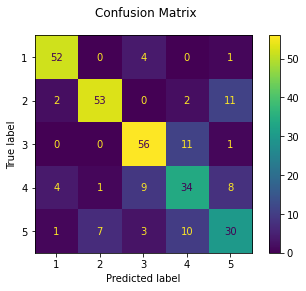

In [14]:
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt

#Model trainieren
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)

#Trainings Genauigkeit 
print("Trainings Geanuigkeit:", clf.score (X_test, Y_test))

#Cross-Validation
from sklearn.model_selection import cross_val_score
ergebnis = cross_val_score(clf, features, labels, cv=4)
print("%0.2f accuracy with a standard deviation of %0.2f" % (ergebnis.mean(), ergebnis.std()))

#Confusion Matrix darstellen
disp = metrics.plot_confusion_matrix(clf, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

Trainings Geanuigkeit: 0.7066666666666667
0.69 accuracy with a standard deviation of 0.03


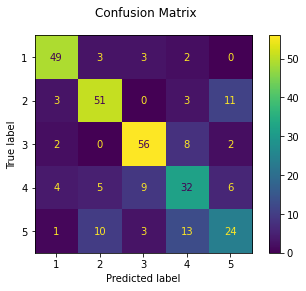

In [15]:
from sklearn.ensemble import RandomForestClassifier

#Model trainieren
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, Y_train)

#Trainings Genauigkeit 
print("Trainings Geanuigkeit:", clf.score (X_test, Y_test))

#Cross-Validation
from sklearn.model_selection import cross_val_score
ergebnis = cross_val_score(clf, features, labels, cv=4)
print("%0.2f accuracy with a standard deviation of %0.2f" % (ergebnis.mean(), ergebnis.std()))

#Confusion Matrix darstellen
disp = metrics.plot_confusion_matrix(clf, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

Trainings Geanuigkeit: 0.74
0.73 accuracy with a standard deviation of 0.02


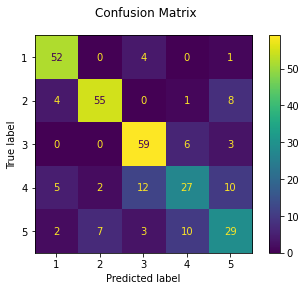

In [16]:
from sklearn.linear_model import LogisticRegression

#Model trainieren
clf = LogisticRegression(random_state=0, multi_class='ovr', max_iter=5000) #max_iter musste ich festlegen, damit eine fehlermeludng nicht kommt --> erklärung dazu auf sklearn seite
clf.fit(X_train, Y_train)

#Trainings Genauigkeit 
print("Trainings Geanuigkeit:", clf.score (X_test, Y_test))

#Cross-Validation
from sklearn.model_selection import cross_val_score
ergebnis = cross_val_score(clf, features, labels, cv=4)
print("%0.2f accuracy with a standard deviation of %0.2f" % (ergebnis.mean(), ergebnis.std()))

#Confusion Matrix darstellen
disp = metrics.plot_confusion_matrix(clf, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()